<h1> KdV

<h4> Essential Libraries </h4>

In [1]:
# --------------------/
%matplotlib inline
# --------------------/

import math
import mpld3
import time
import numpy as np
import matplotlib.pyplot as plt

# --------------------/

from pylab import *
from scipy import *
from ipywidgets import *

from numpy import asmatrix as MX
from scipy.sparse import spdiags

# --------------------/
#mpld3.enable_notebook()
# --------------------/

<h4> Template </h4>

time steps = 6853


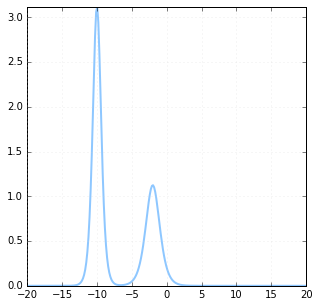

In [2]:
# --------------------/
# time and space domain

a = -20.0
b =  20.0
T =  8.0

# --------------------/
# definitions

m = 256
h = (b - a) / (1.0 + m)
k = 0.0075 * h
n = int(round(T / k))

# --------------------/
# space domain
x = np.linspace(a, b, m)

# time domain
#t = np.linspace(0, T, n)

# for nth-diagonal matrix
o = np.ones(m)

# vector solution with phantom domain
u = np.zeros(m + 4)
U = np.zeros((m,n))

# --------------------/

alpha = k / (2.0*h)
beta  = k / (2.0*h**3)

# --------------------/
# source
# parameters: v, x0
f  = lambda x, x0, v: 2.0*(v**2)*np.cosh(v*(x - x0))**(-2)

# initial condition u(x,t0)
u[2:-2] = f(x,-10.0,1.25) + f(x,-2.0,0.75)

# --------------------/

plt.figure(figsize=(5,5))
plt.plot(x, u[2:-2], lw=2, alpha=0.5, color='dodgerblue')
plt.grid(color='lightgray', alpha=0.75)
plt.ylim(u.min(), u.max())

# --------------------/
print 'time steps =', n
# --------------------/

<h4> Crank–Nicolson Scheme </h4>

In [3]:
# --------------------/
# algorithm

tic = time.clock()

for i in range(1, n):
    
    p = 6.0*alpha*u[2:-2] - 4.0*beta - 1.0
    q = 6.0*alpha*u[2:-2] - 4.0*beta + 1.0
    r = 6.0*beta - 12.0*alpha*u[2:-2]
    
    # linear system
    A = spdiags(
        [beta*o, p, r, q, beta*o],
        [-2, -1, 0, 1, 2], m, m
    ).toarray()
    
    B = (u[3:-1] - u[1:-3] - 
         beta*(u[:-4] - 4*u[1:-3] + 6*u[2:-2] - 4*u[3:-1] + u[4:] )
        )
                
    # casting vector solution
    U[:,i] = u[2:-2] = np.asarray(MX(A).I * MX(B).T)[:,0]

# --------------------/
# elapsed time 

toc = time.clock()
print 'time =', toc - tic


time = 67.475552


<h4> Plots </h4>

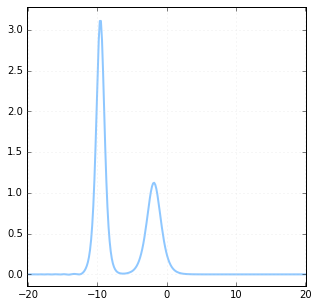

In [4]:
# --------------------/
# plots

def evolution(step):
    plt.figure(figsize=(5,5))
    plt.plot(x, U[:,step], lw=2, alpha=0.5, color='dodgerblue')
    plt.grid(color='lightgray', alpha=0.75)
    plt.xlim(x.min() - 0.125, x.max() + 0.125)
    plt.ylim(U.min() - 0.125, U.max() + 0.125)

# --------------------/
# interactive plot

step = widgets.IntSlider(min=1, max=int(n*0.95)-1, description='step')
interact(evolution, step=step)


> NB property of [FVNTS](http://www.fvnts.ch/) 